# Correlation Between anti-lgbtq hatecrimes and legislation passed
* Where did we get this data?
    1. FBI hate crimes database from this link: 
        https://cde.ucr.cjis.gov/
    2. ACLU's legislation tracker from this link: 
        https://www.aclu.org/legislation-affecting-lgbtq-rights-across-country-2021
* Defintions we must make: 
    * for more inforamtion about what classifies as a hatecrime in addition to how data collection was made, please refer to the fbi database linked above
    * in addition we must clarify the defintion for religious exemption bills:
        - these bills allow the exemption of discrimination based on the belief of religion, for example: a woman was fired from work because of religious exemption, being she was pregnant before getting married, not abiding to organization's religious beliefs
    * bills preempting protection:
        - according to the ACLU, 'These bills prevent cities and other local government entities from passing nondiscrimination protections that are more expansive than the protections offered at the state level, including protections for LGBTQ people.'
* Possible predictor values: 
    1. number of ACLU flagged anti-lgbtq legislation passed (maybe per state)
    2. 2020 presidential election results (dem or rep) 
    3. senate/house majority of state
* Possible Response values:
    1. lgbtq hatecrime incidents/offenses
    2. lgbtq hatecrime percentage of all hatecrimes per state
* Data Table Variable Names:
    * crimesByBias <- fbi table 1 hate crimes by bias, basically summarizes number of offenses/victims with bias incidents
        * more notes: 
        * "1 The term victim may refer to an individual, business/financial institution, government entity, religious organization, or society/public as a whole.",,,,
        * "2 The term known offender does not imply the suspect's identity is known; rather, the term indicates some aspect of the suspect was identified, thus distinguishing the suspect from an unknown offender.",,,,
        * 3 A multiple-bias incident is an incident in which one or more offense types are motivated by two or more biases.,,,,

    * typeOfCrime <- type of crimes committed upon each bias group (ex: assault, manlsaughter, rape, intimidation, etc. 
        * 1 The figures shown include additional offenses collected in the National Incident-Based Reporting System. See the downloadable Methodology file for further explanation.															
        * 2 A multiple-bias incident is an incident in which one or more offense types are motivated by two or more biases.
    * crimeVictims <- shows types of victims (adult/juvenile), and number of victims per crime
        * 1 The term victim may refer to an individual, business/financial institution, government entity, religious organization, or society/public as a whole.																	
        * 2 The figures shown are individual victims only.																	
        * 3 The figures shown include additional offenses collected in the National Incident-Based Reporting System. See the downloadable Methodology file for further explanation.																	
        * 4 A multiple-bias incident is an incident in which one or more offense types are motivated by two or more biases.																	
        * Note: The aggregate of adult and juvenile individual victims does not equal the total number of victims because total victims include individuals, businesses/financial institutions, government entities, religious organizations, and society/public as a whole. In addition, the aggregate of adult and juvenile individual victims does not equal the aggregate of victims of crimes against persons because not all law enforcement agencies report the ages of individual victims.
    * crimeLocation <- shows location of where the crime happened (on school grounds, public, business, etc)
        * 1 A multiple-bias incident is an incident in which one or more offense types are motivated by two or more biases.								
        * 2 The location designation School/college has been retained for agencies that have not updated their records management systems to include the new location designations of Schoolâ€”college/university and Schoolâ€”elementary/secondary, which allow for more specificity in reporting.	
    * crimeState <- shows crime by state and city
        * 1 Population figures are published only for the cities. The figures listed for the universities and colleges are student enrollment and were provided by the United States Department of Education for the 2020 school year, the most recent available. The enrollment figures include full-time and part-time students.													
        * 2 The figures shown include one incident reported with more than one bias motivation.													
        * 3 Student enrollment figures were not available.
    * antiLgbtq <- shows amount of anti-LGBTQ and trans laws 
    * religiousExemption <- shows amount of bills passed from relgiious exemption (see definition above)
    * preemptingProtection <- shows amount of bills preempting LGBTQ protection (see definition above) 
    * lgbtqEquality <- shows bills passed to protect LGBTQ rights 


In [3]:
#var names for kaggle:
crimesByBias <- read.csv('/kaggle/input/hatecrimeproject/fbit1crimesByBias.csv')
typeOfCrime <- read.csv('/kaggle/input/hatecrimeproject/fbit4crimesByBiasMotivation.csv')
crimeVictims <- read.csv('/kaggle/input/hatecrimeproject/fbit7_Victims_Offense_Type_by_Bias_Motivation_2021.csv')
crimeLocation <- read.csv('/kaggle/input/hatecrimeproject/fbit10incidents_Bias_Motivation_by_Location_2021.csv')
crimeTypeByState <-read.csv('/kaggle/input/hatecrimeproject/fbit11crimeTypeByState.csv')
crimeState <- read.csv("/kaggle/input/hatecrimeproject/fbit13.csv")
antiLgbtq <-  read.csv('/kaggle/input/hatecrimeproject/AntiLGBTQ.csv')
religiousExemption <- read.csv('/kaggle/input/hatecrimeproject/ReligiousExemptionBills.csv')
preemptingProtection <- read.csv('/kaggle/input/hatecrimeproject/BillsPreemptingProtection.csv')
lgbtqEquality <- read.csv('/kaggle/input/hatecrimeproject/LGBTQequality.csv')

In [4]:
#cleaning data frames KIND OF
# Fbi data
crimesByBias <- data.frame(c=crimesByBias)
colnames(crimesByBias) <-c('Bias_Motivation','Incidents','Offenses','Victims','Known_Offenders')
typeOfCrime <- data.frame(c=typeOfCrime)
colnames(typeOfCrime) <-c('Bias_Motivation','Total_Offenses','Murder_and_nonnegligent_manslaughter',
                          'Rape','Aggravated_Assault','Simple Assault','Intimidation','Other','Robbery', 'Burgalry', 
                          'Larceny','Motor_Vehicle_Theft', 'Arson','Destruction/Damage/Vandalism','Other','Crimes_against_society')
typeOfCrime<- typeOfCrime[6:47,]
crimeVictims <- data.frame(c=crimeVictims)
colnames(crimeVictims) <- c('Bias_Motivation','Total_Victims','Total_Adult_Victims','Total_Juvenile_Victims',
                            'Murder_and_nonnegligent_manslaughter','Rape','Aggravated_Assault','Simple Assault','Intimidation','Other','Robbery', 'Burgalry', 
                          'Larceny','Motor_Vehicle_Theft', 'Arson','Destruction/Damage/Vandalism','Other','Crimes_against_society')
crimeVictims <- crimeVictims[6:48,]
crimeLocation <- data.frame(c=crimeLocation)
colnames(crimeLocation) <- c('Location','Total_Incidents','Race/Ethnicity/Ancestry','Religion',
                             'Sexual_Orientation','Disability','Gender','Gender_Identity','Multiple_bias_incidents')
crimeLocation <- crimeLocation[6:53,]
crimeTypeByState <-data.frame(c=crimeTypeByState)
colnames(crimeTypeByState) <- c('State','Total_Offenses','Murder_and_nonnegligent_manslaughter','Rape','Aggravated_Assault','Simple Assault','Intimidation','Other','Robbery', 'Burgalry', 
                          'Larceny','Motor_Vehicle_Theft', 'Arson','Destruction/Damage/Vandalism','Other','Crimes_against_society')
crimeTypeByState <- crimeTypeByState[6:57,]
crimeState <- data.frame(c=crimeState)
colnames(crimeState) <- c('State','Race/Ethnicity/Ancestry','Religion',
                         'Sexual_Orientation','Disability','Gender','Gender_Identity')
crimeState <-crimeState[1:51,]
#ACLU Data
antiLgbtq <- data.frame(c=antiLgbtq)
antiLgbtq <-antiLgbtq[0:3]
colnames(antiLgbtq) <-c('State','Bill_Number','Status')
religiousExemption <- data.frame(c=religiousExemption)
religiousExemption <-religiousExemption[0:3]
colnames(religiousExemption) <-c('State','Bill_Number','Status')
preemptingProtection <- data.frame(c=preemptingProtection)
preemptingProtection <- preemptingProtection[0:3]
colnames(preemptingProtection) <-c('State','Bill_Number','Status')
lgbtqEquality <- data.frame(c=lgbtqEquality)
lgbtqEquality<-lgbtqEquality[0:3]
colnames(lgbtqEquality) <-c('State','Bill_Number','Status')

In [5]:
hatecrimes <-crimeState
hatecrimes$sum <- rowSums(hatecrimes[,c(2:7)])
head(hatecrimes)
plt <-hatecrimes
plt <-plt[,-c(2,3,4,5,6,7)]
summary(plt)
na.omit(hatecrimes)

,State,Race/Ethnicity/Ancestry,Religion,Sexual_Orientation,Disability,Gender,Gender_Identity,sum
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,Alabama,137,72,32,5,5,4,255
2,Alaska,5,0,4,0,2,1,12
3,Arizona,61,15,16,0,0,4,96
4,Arkansas,31,3,9,0,3,2,48
5,California,49,6,16,0,0,3,74
6,Colorado,182,40,67,4,1,18,312


    State                sum        
 Length:51          Min.   :  1.00  
 Class :character   1st Qu.: 44.75  
 Mode  :character   Median :101.50  
                    Mean   :152.60  
                    3rd Qu.:222.25  
                    Max.   :651.00  
                    NA's   :1       

,State,Race/Ethnicity/Ancestry,Religion,Sexual_Orientation,Disability,Gender,Gender_Identity,sum
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,Alabama,137,72,32,5,5,4,255
2,Alaska,5,0,4,0,2,1,12
3,Arizona,61,15,16,0,0,4,96
4,Arkansas,31,3,9,0,3,2,48
5,California,49,6,16,0,0,3,74
6,Colorado,182,40,67,4,1,18,312
7,Connecticut,65,9,17,1,0,0,92
8,Delaware,5,2,2,0,0,0,9
9,Florida,1,0,0,0,0,0,1


In [36]:
hatecrimes[9,]

,State,Race/Ethnicity/Ancestry,Religion,Sexual_Orientation,Disability,Gender,Gender_Identity,sum
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
9,Florida,1,0,0,0,0,0,1


In [39]:
reportingStates <- read_csv('/kaggle/input/hatecrimeproject/reportingStates.csv')
reportingStates

Rows: 50 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): state
dbl (2): angenciesReported, incidentsReported
num (3): population, populationCovered, participatingAgencies

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


state,population,populationCovered,participatingAgencies,angenciesReported,incidentsReported
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,3734077,3734077,356,77,242
Alaska,402557,402557,30,6,9
Arizona,3949562,3949562,79,26,93
Arkansas,2916168,2916168,285,23,42
California,2861998,2861998,15,10,73
Colorado,5766585,5766585,235,68,285
Connecticut,3605597,3605597,107,44,89
Delaware,1003384,1003384,62,6,9
Florida,0,0,2,1,1


In [37]:
merged[9,]

,State,Abbreviation,Sexual_Orientation,Gender,Gender_Identity,antilgbtqFreq,religiousExemptionFrequency,preemptingProtectionFrequency,lgbtqFreq,crimeSum,antiFreq,DEM,REP,percent_democrat,percent_republican,population,senate,house,crime_percent
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
9,Florida,FL,0,0,0,6,0,0,0,0,6,5294767,5667834,48.29846,51.70154,10962601,Republican,Republican,0


fbi tables:
- crimeByBias
- typeOfCrime
- crimeVictims
- crimeLocation
- crimeTypeByState
- crimeState


ACLU tables:
- antiLgbtq
- religiousExemption
- preemptingProtection
- lgtbqEquality

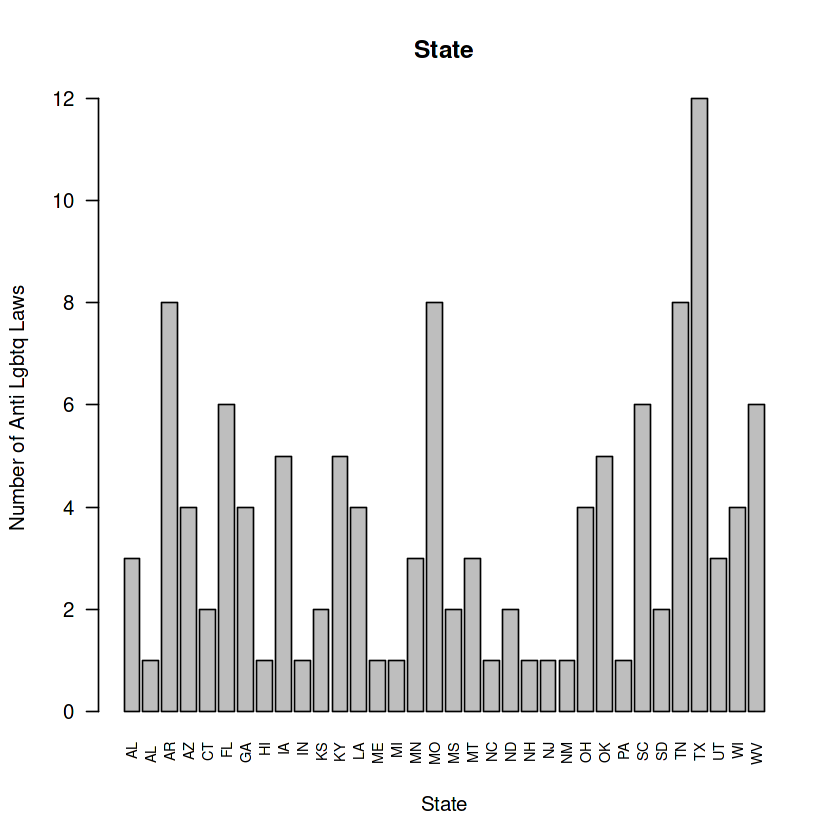

In [5]:
counts <- table(antiLgbtq$State)
barplot(counts, main='State', xlab = 'State', ylab='Number of Anti Lgbtq Laws',las = 2,cex.names = 0.7)
#antiLgbtq

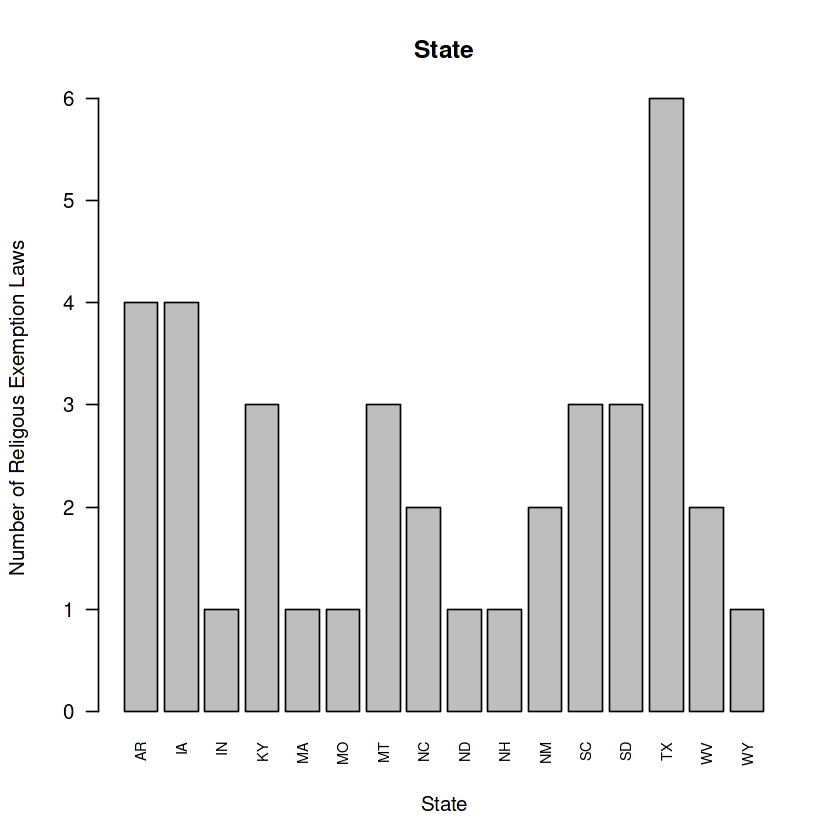

In [6]:
counts <- table(religiousExemption$State)
barplot(counts, main='State', xlab = 'State', ylab='Number of Religous Exemption Laws',las = 2,cex.names = 0.7)

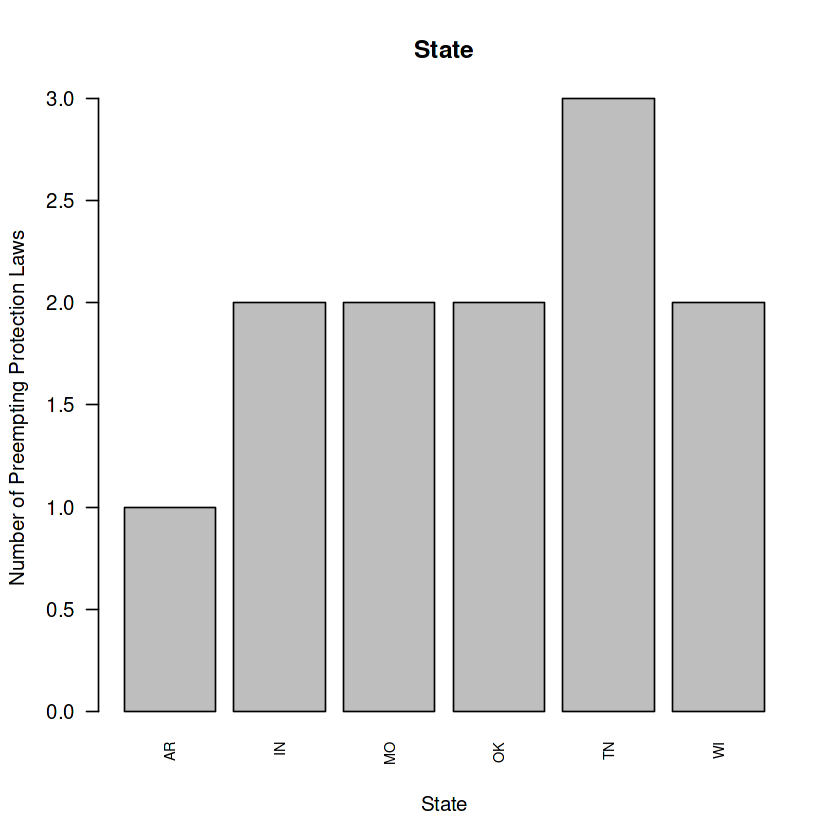

In [7]:
counts <- table(preemptingProtection$State)
barplot(counts, main='State', xlab = 'State', ylab='Number of Preempting Protection Laws',las = 2,
        cex.names = 0.7)

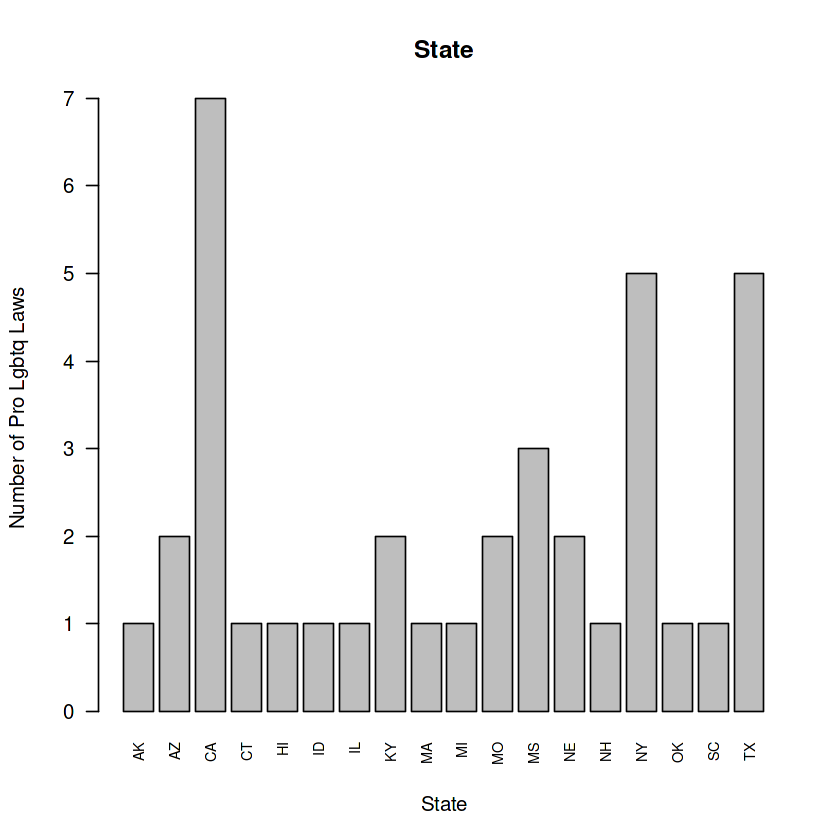

In [8]:
counts <- table(lgbtqEquality$State)
barplot(counts, main='State', xlab = 'State', ylab='Number of Pro Lgbtq Laws',las = 2,
        cex.names = 0.7)

In [9]:
head(crimeState)
fix(crimeState)

,State,Race/Ethnicity/Ancestry,Religion,Sexual_Orientation,Disability,Gender,Gender_Identity
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,Alabama,137,72,32,5,5,4
2,Alaska,5,0,4,0,2,1
3,Arizona,61,15,16,0,0,4
4,Arkansas,31,3,9,0,3,2
5,California,49,6,16,0,0,3
6,Colorado,182,40,67,4,1,18


ERROR: Error in .External2(C_edit, name, file, title, editor): problem with running editor vi


In [6]:
names(crimeState)

[1] "State"                   "Race/Ethnicity/Ancestry"
[3] "Religion"                "Sexual_Orientation"     
[5] "Disability"              "Gender"                 
[7] "Gender_Identity"

In [7]:
crimeState <- na.omit(crimeState)

Data aggregation

In [8]:
dataset1 <- crimeState
drop <- c("Race/Ethnicity/Ancestry", "Religion", "Disabilitiy")
dataset1 <- dataset1[,!(names(dataset1) %in% drop)]
# now we count the bills for each category from ACLU and then add it to the dataset1 respective to State
antiLgbtqFreq<- data.frame(table(antiLgbtq$State))
religiousExemptionFreq <- data.frame(table(religiousExemption$State))
preemptingProtectionFreq <-data.frame(table(preemptingProtection$State))
lgbtqEqualityFreq <-data.frame(table(lgbtqEquality$State))
#antiLgbtqFreq
colnames(antiLgbtqFreq) <- ('Abbrv')
colnames(antiLgbtqFreq)[2] <- ('antilgbtqFreq')
#religiousExemptionFreq
colnames(religiousExemptionFreq) <- ('Abbrv')
colnames(religiousExemptionFreq)[2] <- ('religiousExemptionFrequency')
#preemptingProtectionFreq
colnames(preemptingProtectionFreq) <- ('Abbrv')
colnames(preemptingProtectionFreq)[2] <- ('preemptingProtectionFrequency')
#lgtbqEqualityFreq
colnames(lgbtqEqualityFreq) <- ('Abbrv')
colnames(lgbtqEqualityFreq)[2] <- ('lgbtqFreq')
#https://ballotpedia.org/Election_results,_2020:_State_legislative_chambers_that_changed_party_control
#extracting state level governments 
stateChambers <- read.csv('/kaggle/input/hatecrimeproject/stateElections.csv')
#now we have to join the state dataset with the dataset1
states <- read.csv('/kaggle/input/hatecrimeproject/states.csv')
states <- data.frame(states)
dataset2 <- merge(dataset1, states, by='State', all=TRUE)
tempdataset <- dataset2
tempdataset <- merge(x=tempdataset, y=antiLgbtqFreq, by.x=c('Abbreviation'), by.y=c('Abbrv'),all=TRUE)
tempdataset <- tempdataset[-c(3),-c(4)]
tempdataset <- merge(x=tempdataset, y=religiousExemptionFreq, by.x=c('Abbreviation'), by.y=c('Abbrv'),all=TRUE)
tempdataset <- merge(x=tempdataset, y=preemptingProtectionFreq, by.x=c('Abbreviation'), by.y=c('Abbrv'),all=TRUE)
tempdataset <- merge(x=tempdataset, y=lgbtqEqualityFreq, by.x=c('Abbreviation'), by.y=c('Abbrv'),all=TRUE)
tempdataset[is.na(tempdataset)] <- 0
tempdataset$crimeSum <- rowSums(tempdataset[,c(3,4,5)], na.rm=TRUE)
tempdataset$antiFreq <- rowSums(tempdataset[,c(6,7,8)],na.rm=TRUE)
statePolarity <- read.csv('/kaggle/input/percent-voting-for-democratic-party-by-state/democratic_vs_republican_votes_by_usa_state_2020.csv')
statePolarity <- statePolarity[-c(9),-c(4)]
statePolarity$percent_republican <- 100 - statePolarity$percent_democrat
statePolarity$population <- rowSums(statePolarity[,c(2,3)])
summary(tempdataset)

 Abbreviation          State           Sexual_Orientation     Gender     
 Length:50          Length:50          Min.   :  0.00     Min.   : 0.00  
 Class :character   Class :character   1st Qu.:  7.00     1st Qu.: 0.00  
 Mode  :character   Mode  :character   Median : 16.00     Median : 1.00  
                                       Mean   : 24.48     Mean   : 1.74  
                                       3rd Qu.: 31.50     3rd Qu.: 2.00  
                                       Max.   :111.00     Max.   :10.00  
 Gender_Identity antilgbtqFreq  religiousExemptionFrequency
 Min.   : 0.00   Min.   : 0.0   Min.   :0.00               
 1st Qu.: 0.00   1st Qu.: 0.0   1st Qu.:0.00               
 Median : 2.50   Median : 1.0   Median :0.00               
 Mean   : 5.58   Mean   : 2.4   Mean   :0.76               
 3rd Qu.: 9.75   3rd Qu.: 4.0   3rd Qu.:1.00               
 Max.   :41.00   Max.   :12.0   Max.   :6.00               
 preemptingProtectionFrequency   lgbtqFreq       crimeSum     

In [9]:
merged = merge(tempdataset, statePolarity, by.x=c('Abbreviation', 'State'), by.y=c('usa_state_code', 'state'))
merged <- merge(merged, stateChambers, by.x=c('State'),by.y=c('state'))
summary(merged)

    State           Abbreviation       Sexual_Orientation     Gender     
 Length:50          Length:50          Min.   :  0.00     Min.   : 0.00  
 Class :character   Class :character   1st Qu.:  7.00     1st Qu.: 0.00  
 Mode  :character   Mode  :character   Median : 16.00     Median : 1.00  
                                       Mean   : 24.48     Mean   : 1.74  
                                       3rd Qu.: 31.50     3rd Qu.: 2.00  
                                       Max.   :111.00     Max.   :10.00  
 Gender_Identity antilgbtqFreq  religiousExemptionFrequency
 Min.   : 0.00   Min.   : 0.0   Min.   :0.00               
 1st Qu.: 0.00   1st Qu.: 0.0   1st Qu.:0.00               
 Median : 2.50   Median : 1.0   Median :0.00               
 Mean   : 5.58   Mean   : 2.4   Mean   :0.76               
 3rd Qu.: 9.75   3rd Qu.: 4.0   3rd Qu.:1.00               
 Max.   :41.00   Max.   :12.0   Max.   :6.00               
 preemptingProtectionFrequency   lgbtqFreq       crimeSum     

In [10]:
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [11]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


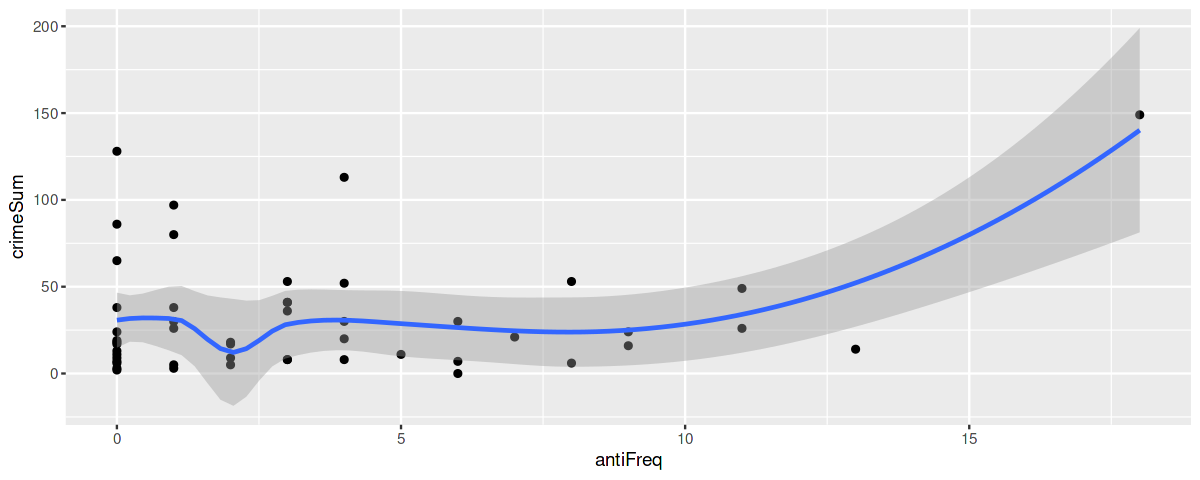

In [12]:
fig(10,4)
ggplot(merged, aes(x=antiFreq, y=crimeSum))+geom_point()+stat_smooth()

In [13]:
cor(merged$antiFreq, merged$crimeSum)

[1] 0.2071215

In [30]:
model <- lm(crimeSum ~ antiFreq, data=merged)
texas <- merged[43,]
washington<- merged[47,]
ohio <- merged[35,]
summary(model)


Call:
lm(formula = crimeSum ~ antiFreq, data = merged)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.328 -22.814 -11.862   9.897 102.122 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   25.878      6.202   4.173 0.000126 ***
antiFreq       1.742      1.187   1.467 0.148956    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.29 on 48 degrees of freedom
Multiple R-squared:  0.0429,	Adjusted R-squared:  0.02296 
F-statistic: 2.151 on 1 and 48 DF,  p-value: 0.149


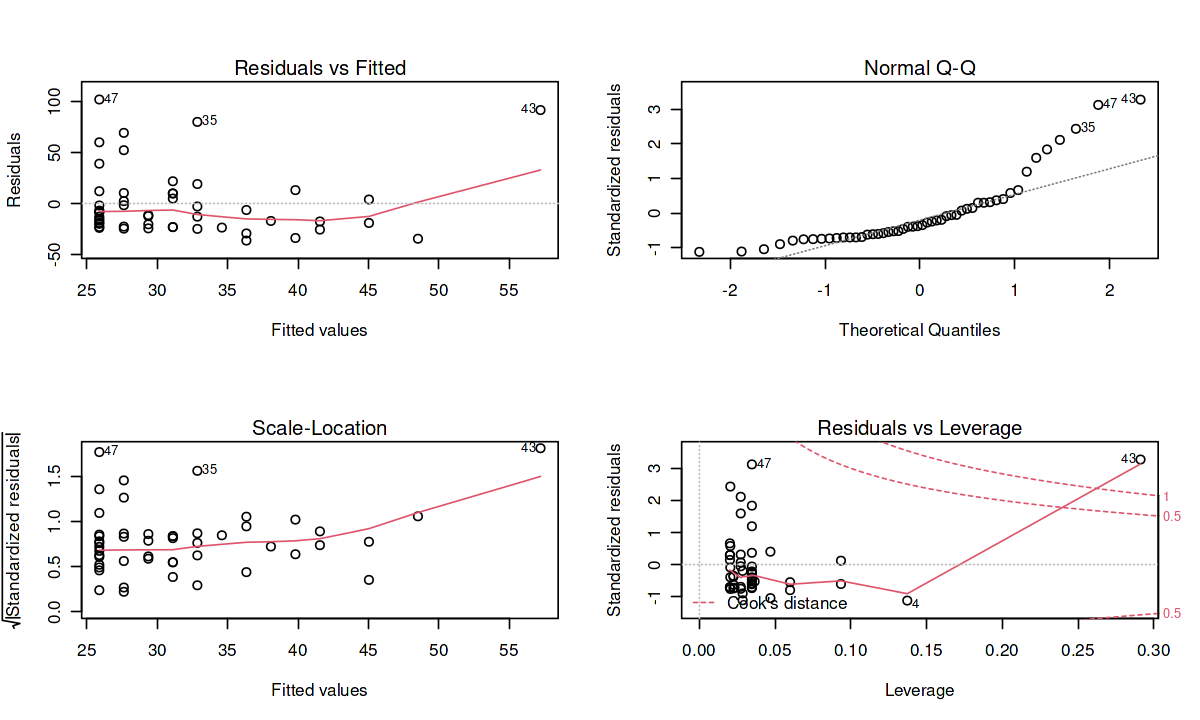

In [19]:
fig(10,6)
par(mfrow =c(2,2))
plot(model)

Above is the linear regression for crimeSums and antiFreq of laws
- found that Texas has the most leverage in the dataset which is interesting because they had the highest of not only just antiLGBTQ hate crimes but also hatecrimes in general from the FBI data. Also having the highest AntiLgbtq legislation count
- Also Washington being an intersting case, having high leverage, high antiLgbtq hatecrime rate yet no antiLGBTQ legislation passed 
- residuals are messy, not even linear safe to assume there is no linear relationship between the two
- therefore it is safe to assume for the raw number of antiLGBTQ hatecrimes and antiLGBTQ legislation, there is no correlation. 
- however in the next model i will consider percentages of crimes instead

New idea: Trying to make crimes as a percentage rather than number

In [28]:
hatecrimes<- na.omit(hatecrimes)
merged$crime_percent <- merged$crimeSum/hatecrimes$sum
head(merged)

,State,Abbreviation,Sexual_Orientation,Gender,Gender_Identity,antilgbtqFreq,religiousExemptionFrequency,preemptingProtectionFrequency,lgbtqFreq,crimeSum,antiFreq,DEM,REP,percent_democrat,percent_republican,population,senate,house,crime_percent
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,Alabama,AL,32,5,4,3,0,0,0,41,3,843473,1434159,37.03289,62.96711,2277632,Republican,Republican,0.1607843
2,Alaska,AK,4,2,1,0,0,0,1,7,0,45758,80999,36.09899,63.90101,126757,Republican,Split,0.5833333
3,Arizona,AZ,16,0,4,4,0,0,2,20,4,1643664,1626679,50.25968,49.74032,3270343,Republican,Republican,0.2083333
4,Arkansas,AR,9,3,2,8,4,1,0,14,13,420985,761251,35.60922,64.39078,1182236,Republican,Republican,0.2916667
5,California,CA,16,0,3,0,0,0,7,19,0,9315259,4812735,65.93476,34.06524,14127994,Democratic,Democratic,0.2567568
6,Colorado,CO,67,1,18,0,0,0,0,86,0,1753416,1335253,56.76931,43.23069,3088669,Democratic,Democratic,0.2756410


In [35]:
texas[,-c(2,3,4,5,6,7,8,9,12,13)]
ohio[,-c(2,3,4,5,6,7,8,9,12,13)]
washington[,-c(2,3,4,5,6,7,8,9,12,13)]

,State,crimeSum,antiFreq,percent_democrat,percent_republican,population,senate,house,crime_percent
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
43,Texas,149,18,47.0419,52.9581,11088669,Republican,Republican,0.2632509


,State,crimeSum,antiFreq,percent_democrat,percent_republican,population,senate,house,crime_percent
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
35,Ohio,113,4,45.94796,54.05204,5683336,Republican,Republican,0.2144213


,State,crimeSum,antiFreq,percent_democrat,percent_republican,population,senate,house,crime_percent
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
47,Washington,128,0,60.33091,39.66909,3817993,Democratic,Democratic,0.1966206


`geom_smooth()` using formula = 'y ~ x'


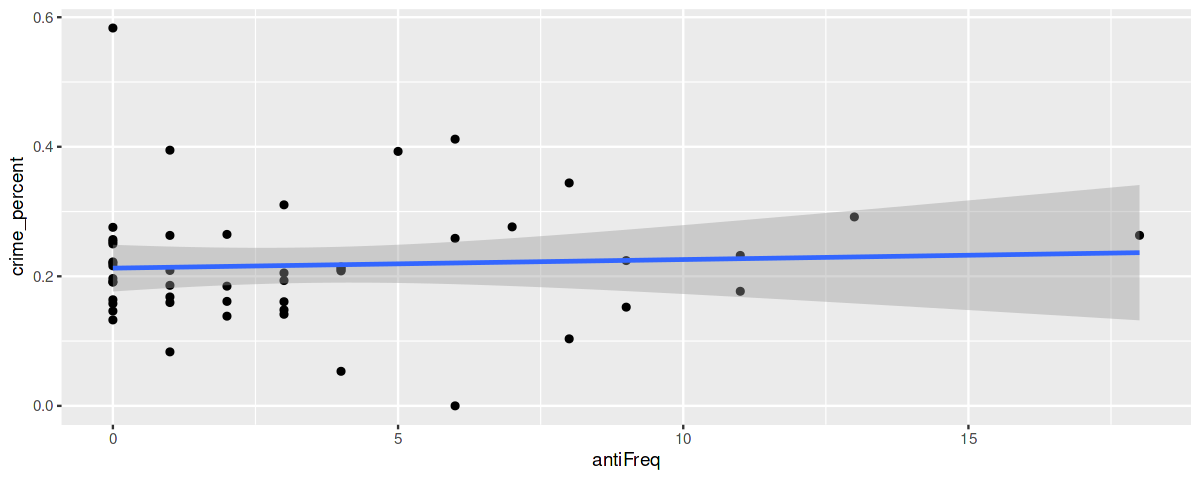

In [21]:
fig(10, 4)
    ggplot(merged, aes(x = antiFreq, y = crime_percent)) +
      geom_point() +
      stat_smooth(method = lm)

[1] 0.05569266


Call:
lm(formula = merged$crime_percent ~ merged$antiFreq)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22059 -0.05432 -0.00892  0.04019  0.37071 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.212619   0.017945  11.848  7.4e-16 ***
merged$antiFreq 0.001328   0.003436   0.386    0.701    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09633 on 48 degrees of freedom
Multiple R-squared:  0.003102,	Adjusted R-squared:  -0.01767 
F-statistic: 0.1493 on 1 and 48 DF,  p-value: 0.7009


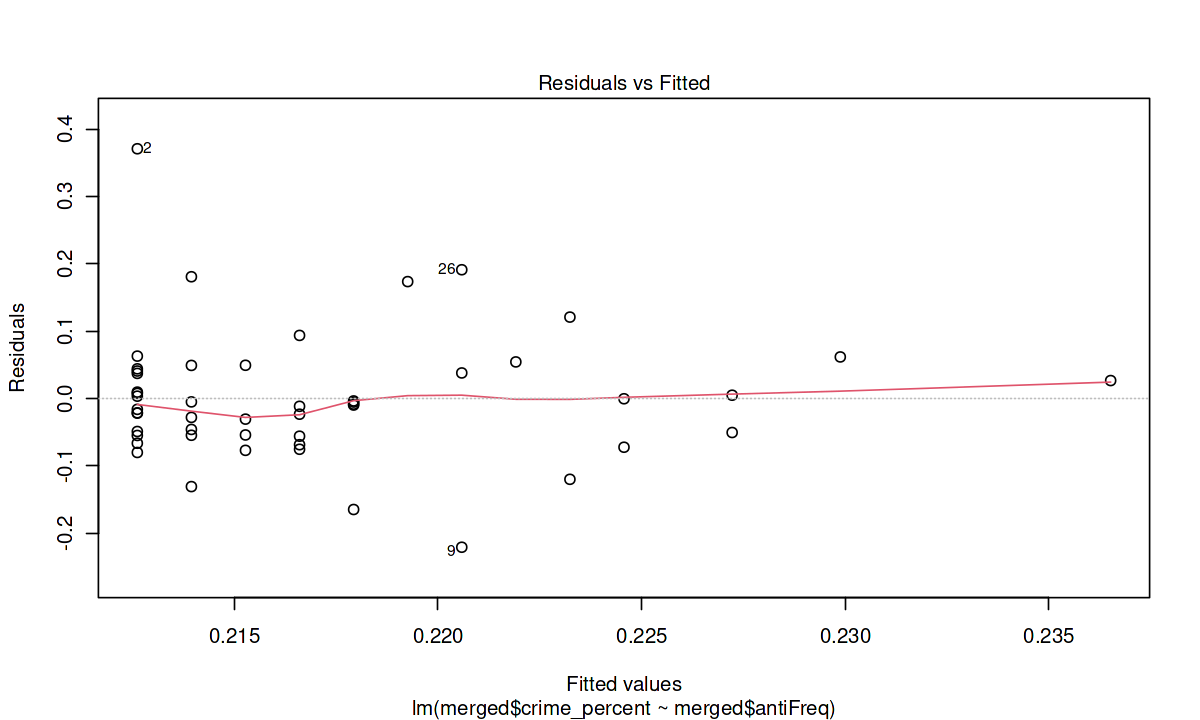

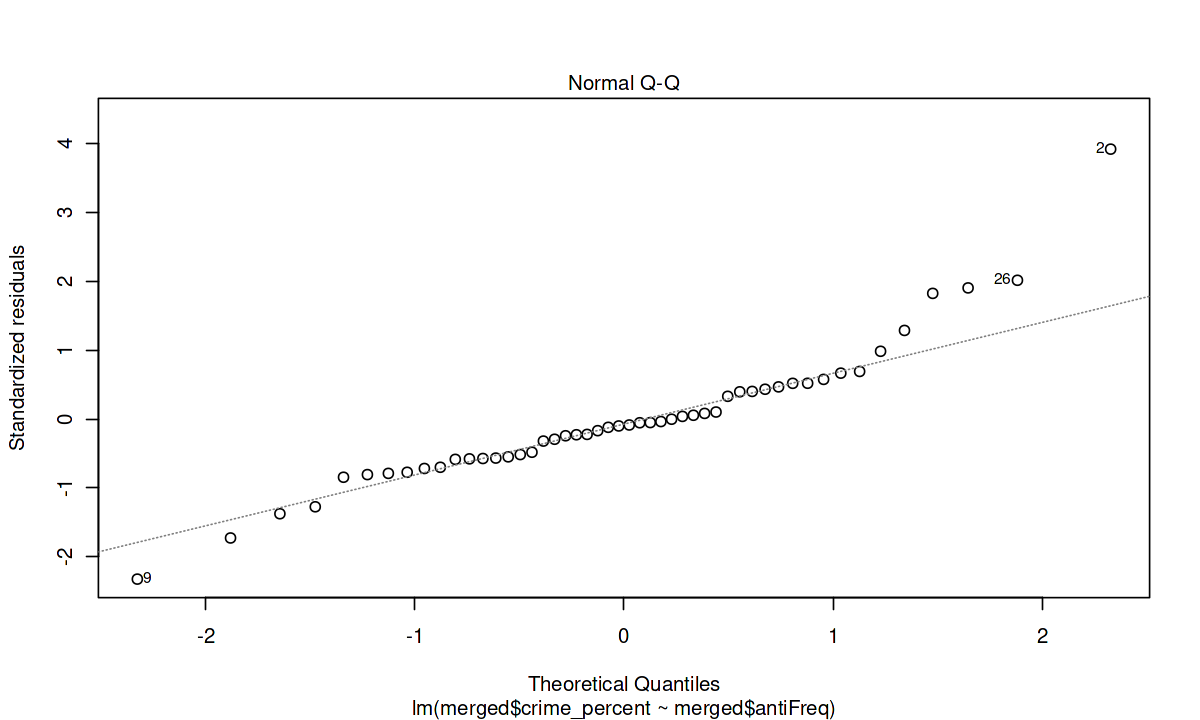

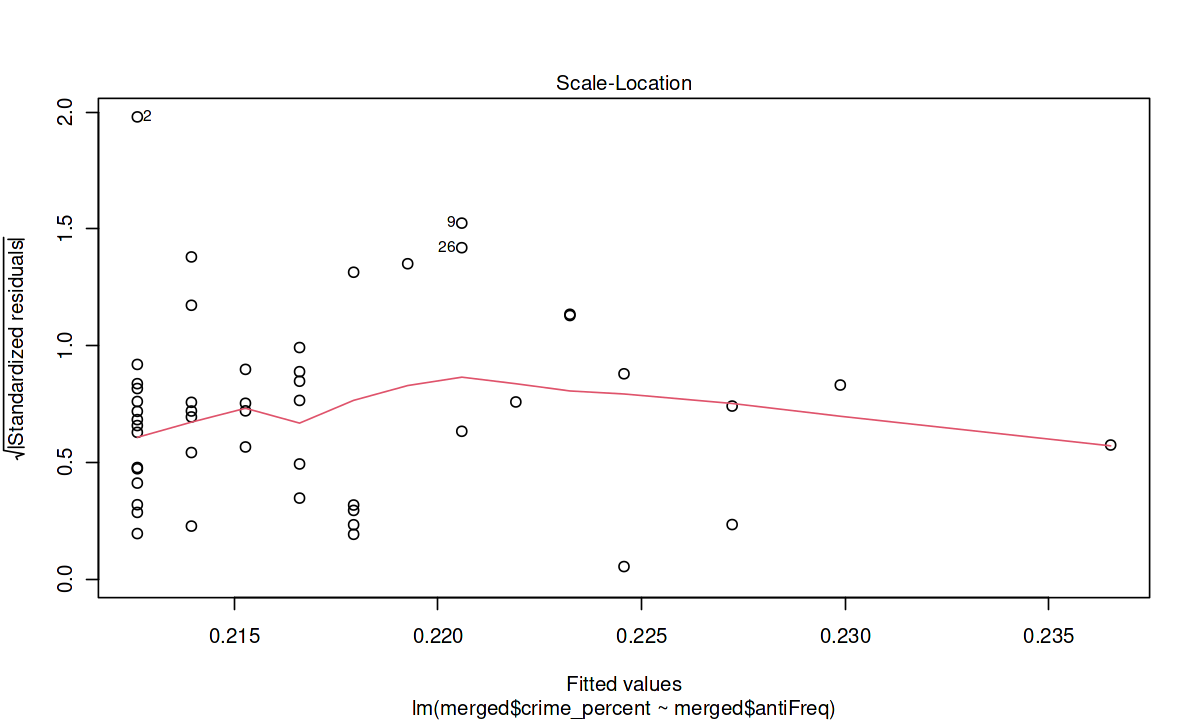

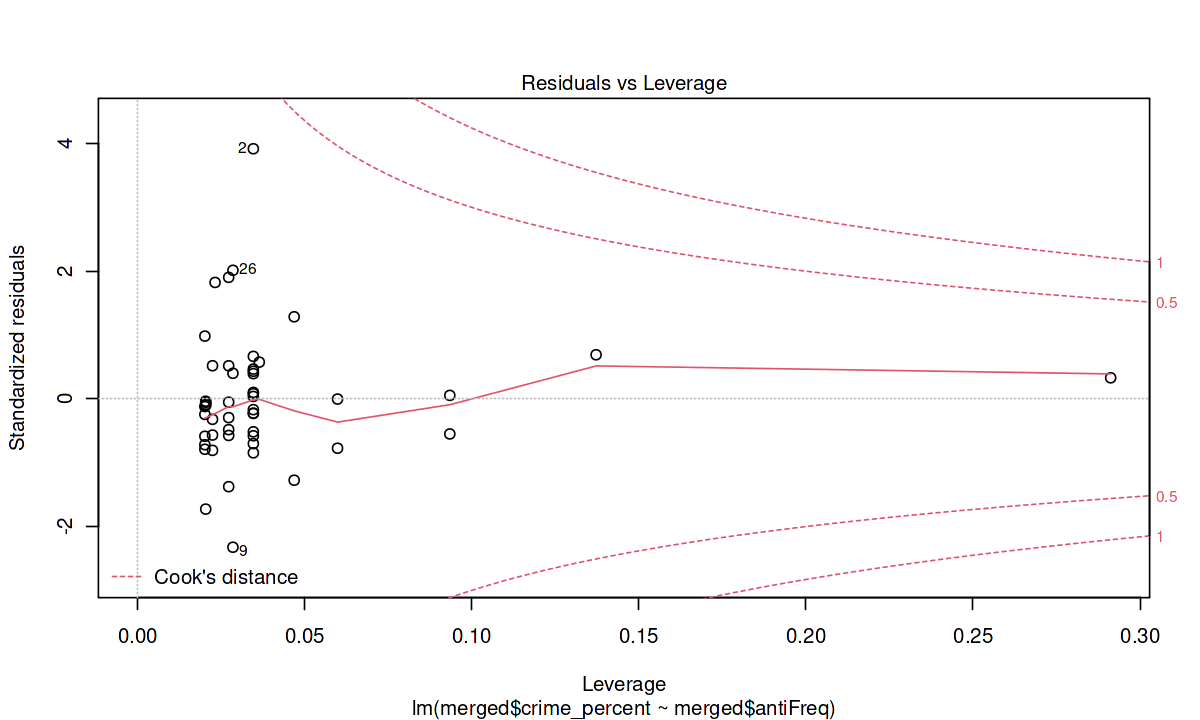

In [26]:
cor(merged$antiFreq, merged$crime_percent)
model <- lm(merged$crime_percent~ merged$antiFreq)
summary(model)
fig(10,6)
plot(model)

Trying Multi-linear regression


Call:
lm(formula = crimeSum ~ lgbtqFreq, data = merged)

Residuals:
   Min     1Q Median     3Q    Max 
-33.59 -23.25 -12.01  10.75 104.35 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   29.497      5.386   5.477 1.56e-06 ***
lgbtqFreq      3.031      3.290   0.921    0.362    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.73 on 48 degrees of freedom
Multiple R-squared:  0.01737,	Adjusted R-squared:  -0.003099 
F-statistic: 0.8486 on 1 and 48 DF,  p-value: 0.3615


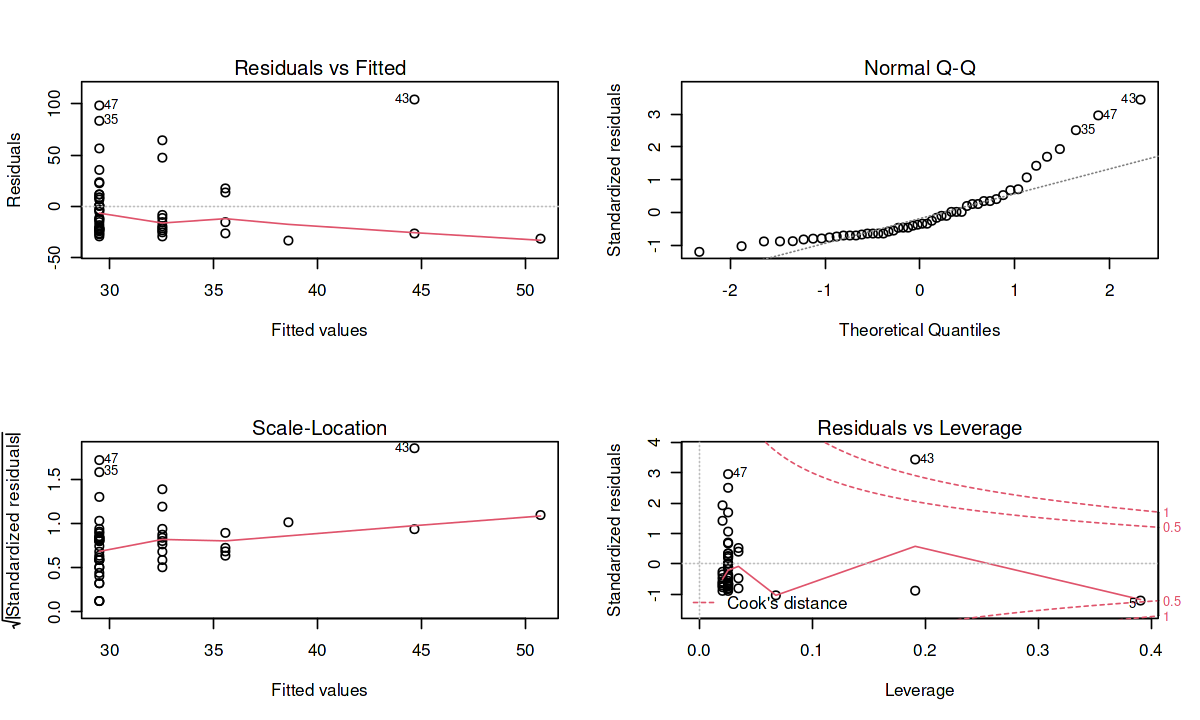

In [23]:
model <- lm(crimeSum ~ lgbtqFreq, data=merged)
summary(model)
fig(10,6)
par(mfrow =c(2,2))  
plot(model)

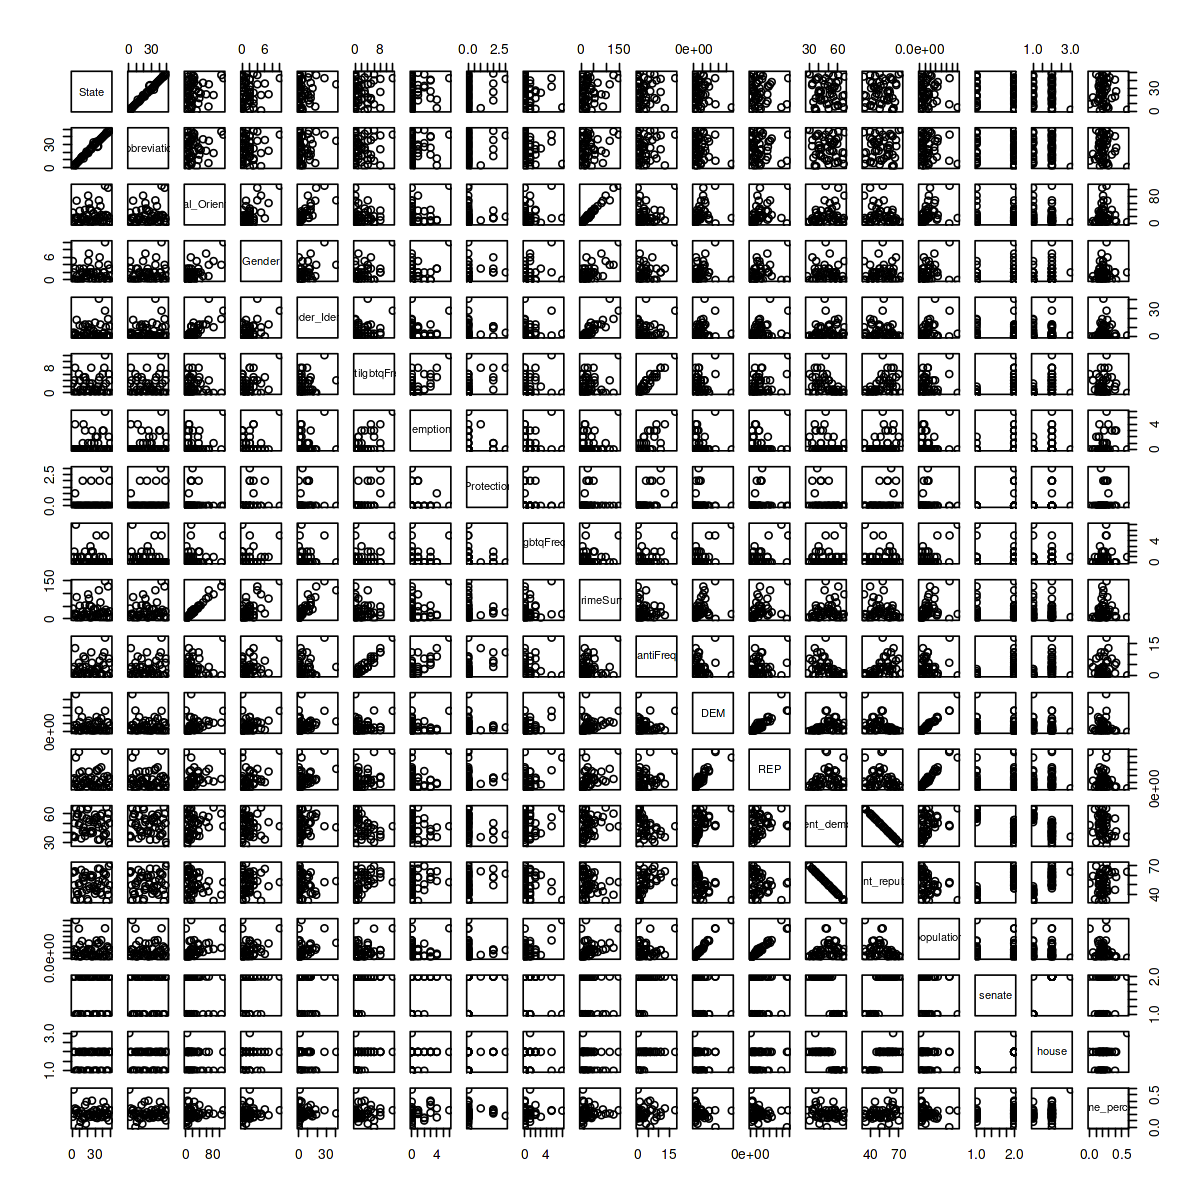

In [27]:
fig(10,10)
plot(merged)



<h1> SUPPORT VECTOR MACHINE FOR Senate majority</h1>

In [25]:
library(e1071)
svmSenate <- merged[2:17]
svmSenate <- svmSenate[,-c(2,3,4,5,6,7,8,11,12,13,14,15)]
svmSenate[svmSenate=='Democratic'] <- 0 
svmSenate[svmSenate=='Republican'] <- 1
svmSenate <-svmSenate[,-c(1)]
svmSenate$senate = factor(svmSenate$senate, levels = c(0,1))
head(svmSenate)
library(caTools)

,crimeSum,antiFreq,senate
,<dbl>,<dbl>,<fct>
1,41,3,1
2,7,0,1
3,20,4,1
4,14,13,1
5,19,0,0
6,86,0,0


Splitting

In [56]:
set.seed(1)
split = sample.split(svmSenate$senate, SplitRatio = 0.75)
trainSet = subset(svmSenate, split==TRUE)
testSet = subset(svmSenate, split==FALSE)
trainSet[-3] = scale(trainSet[-3])
testSet[-3] = scale(testSet[-3])

Feature scaling


Call:
svm(formula = senate ~ ., data = trainSet, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  19


4  7 10 11 12 21 24 27 33 34 37 44 
 1  1  1  0  0  0  1  0  1  1  0  1 
Levels: 0 1

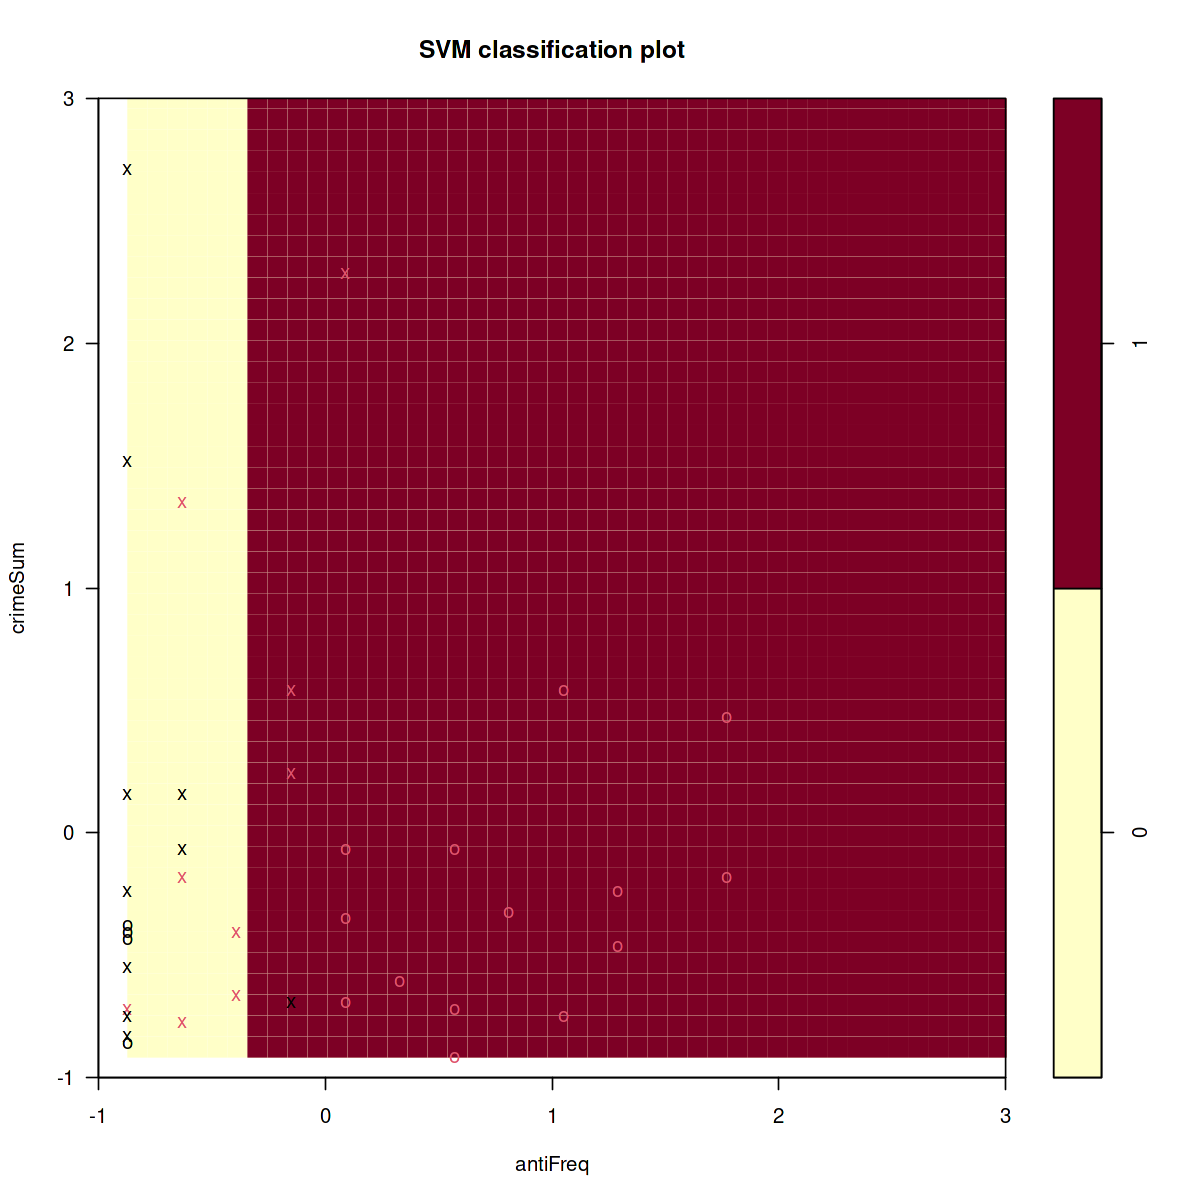

In [57]:
#SVM https://www.geeksforgeeks.org/classifying-data-using-support-vector-machinessvms-in-r/#
#https://www.kaggle.com/code/aniketvishwakarma/alternative-of-elemstatlearn-for-visualisation
classifier = svm(formula= senate ~., data = trainSet,kernel='linear')
classifier
y_pred = predict(classifier, newdata = testSet[-3])
y_pred
fig <- function(width, height){
    options(repr.plot.width = width, repr.plot.height = height)
}
fig(10,10)
plot(classifier, trainSet, xlim=c(-1,3),ylim=c(-1,3))

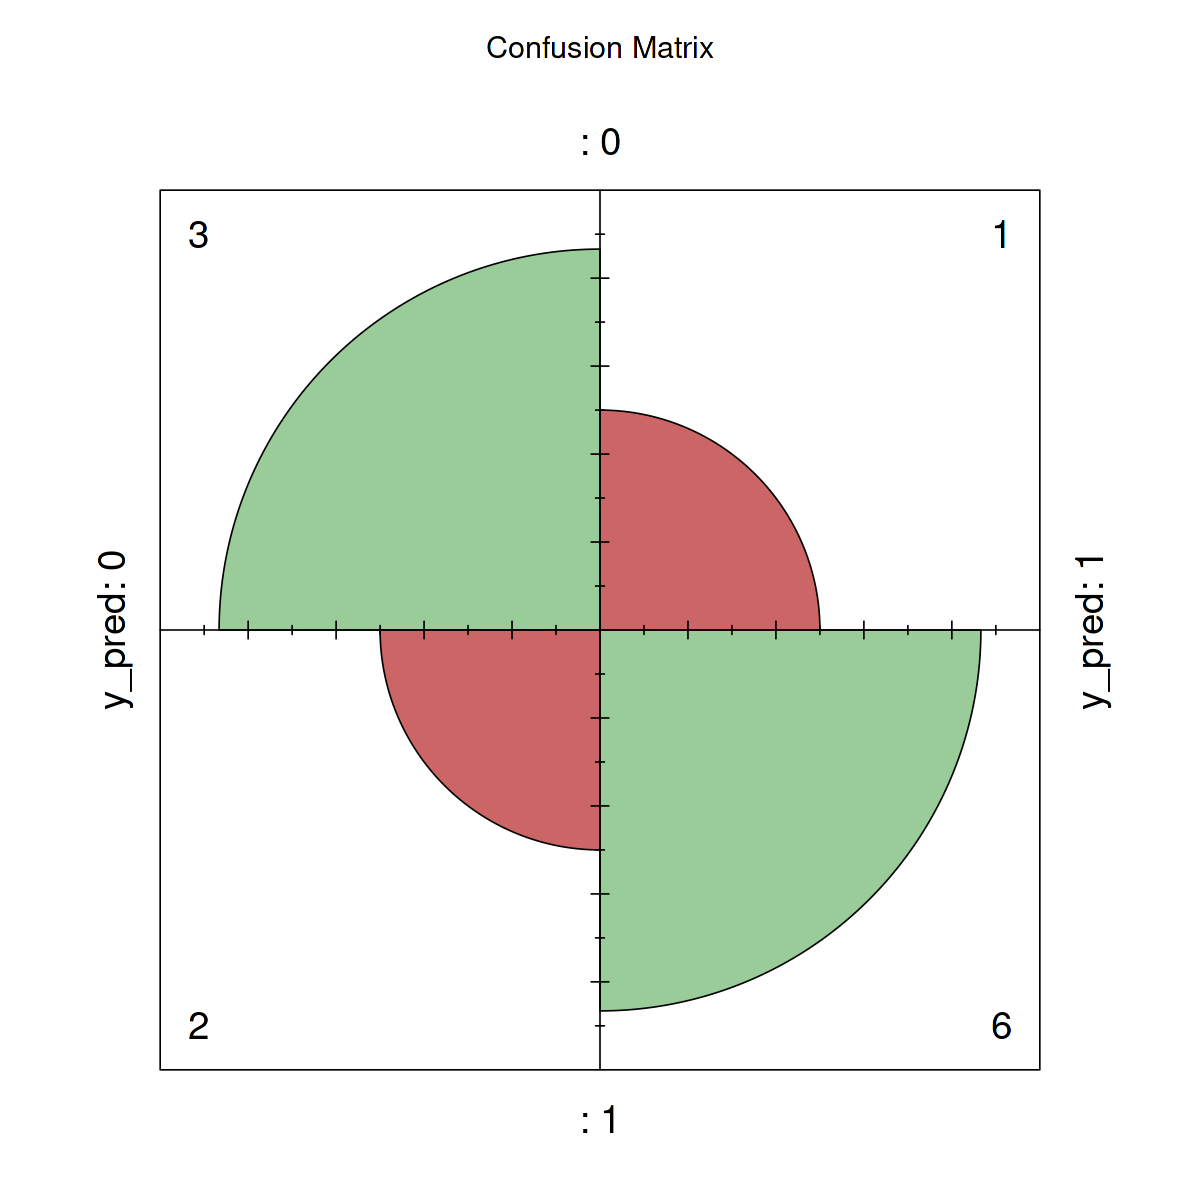

In [58]:
cmL <- table(testSet$senate,y_pred)
fourfoldplot(cmL, color = c("#CC6666", "#99CC99"),
             conf.level = 0, margin = 1, main = "Confusion Matrix")

In the confusion matrix above:
#remeber that 0 is Democrat and 1 is Republican majority Senate
- 2 false democratic
- 1 false republiucan
- 3 correct for democratic
- 6 correct for republican


- 75% accuracy rate
- 8.33% false republican rate
- 16.67% false democratic

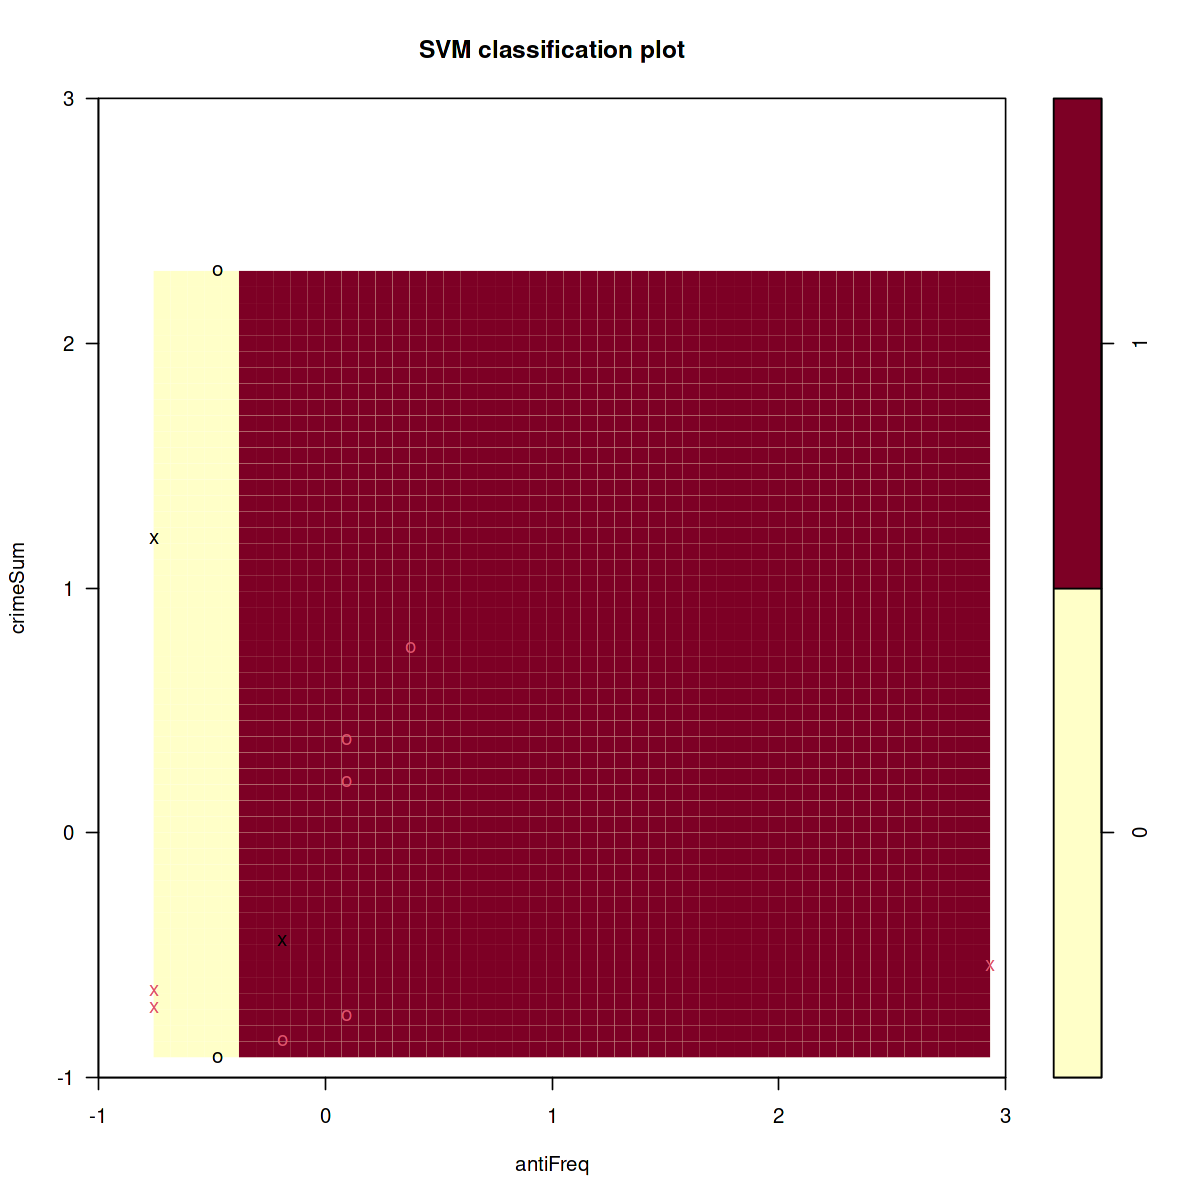

In [59]:
plot(classifier, testSet, xlim=c(-1,3),ylim=c(-1,3))

<h1> Now we do SVM for house </h1>

In [60]:
head(merged)

,State,Abbreviation,Sexual_Orientation,Gender,Gender_Identity,antilgbtqFreq,religiousExemptionFrequency,preemptingProtectionFrequency,lgbtqFreq,crimeSum,antiFreq,DEM,REP,percent_democrat,percent_republican,population,senate,house,crime_percent
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,Alabama,AL,32,5,4,3,0,0,0,41,3,843473,1434159,37.03289,62.96711,2277632,Republican,Republican,0.1607843
2,Alaska,AK,4,2,1,0,0,0,1,7,0,45758,80999,36.09899,63.90101,126757,Republican,Split,0.5833333
3,Arizona,AZ,16,0,4,4,0,0,2,20,4,1643664,1626679,50.25968,49.74032,3270343,Republican,Republican,0.2083333
4,Arkansas,AR,9,3,2,8,4,1,0,14,13,420985,761251,35.60922,64.39078,1182236,Republican,Republican,0.2916667
5,California,CA,16,0,3,0,0,0,7,19,0,9315259,4812735,65.93476,34.06524,14127994,Democratic,Democratic,0.2567568
6,Colorado,CO,67,1,18,0,0,0,0,86,0,1753416,1335253,56.76931,43.23069,3088669,Democratic,Democratic,0.2756410



Call:
svm(formula = majority ~ ., data = trainSet2, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  19


3 10 11 12 16 19 22 24 34 41 48 49 
 1  1  0  0  0  0  0  0  1  1  1  1 
Levels: 0 1

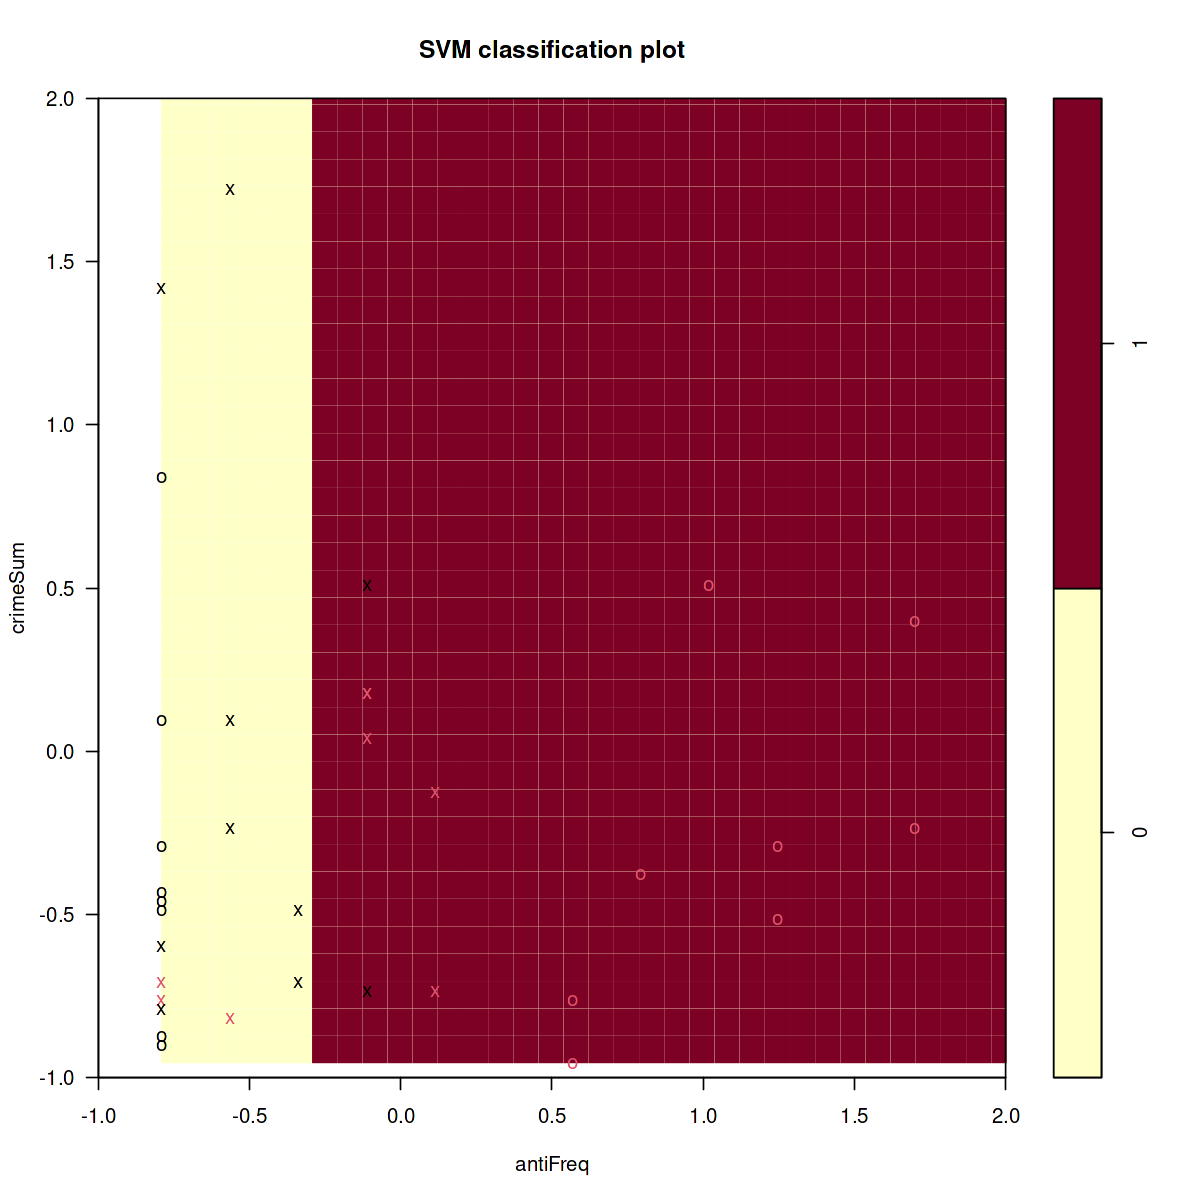

In [61]:
library(e1071)
svmPres <- merged[9:15]
svmPres <- svmPres[,-c(1,4,5)]
svmPres$majority <- ifelse(svmPres$percent_republican < 50, 0, 1)
svmPres <- svmPres[,-c(3,4)]
svmPres$majority = factor(svmPres$majority, levels = c(0,1))
set.seed(123)
split = sample.split(svmPres$majority, SplitRatio = 0.75)
trainSet2 = subset(svmPres, split==TRUE)
testSet2 = subset(svmPres, split==FALSE)
trainSet2[-3] = scale(trainSet2[-3])
testSet2[-3] = scale(testSet2[-3])
classifier2 = svm(formula= majority ~. , data = trainSet2,kernel='linear')
classifier2
y_pred = predict(classifier2, newdata = testSet2[-3])
y_pred
plot(classifier2, trainSet2, xlim=c(-1,2),ylim=c(-1,2))

Above is the training data

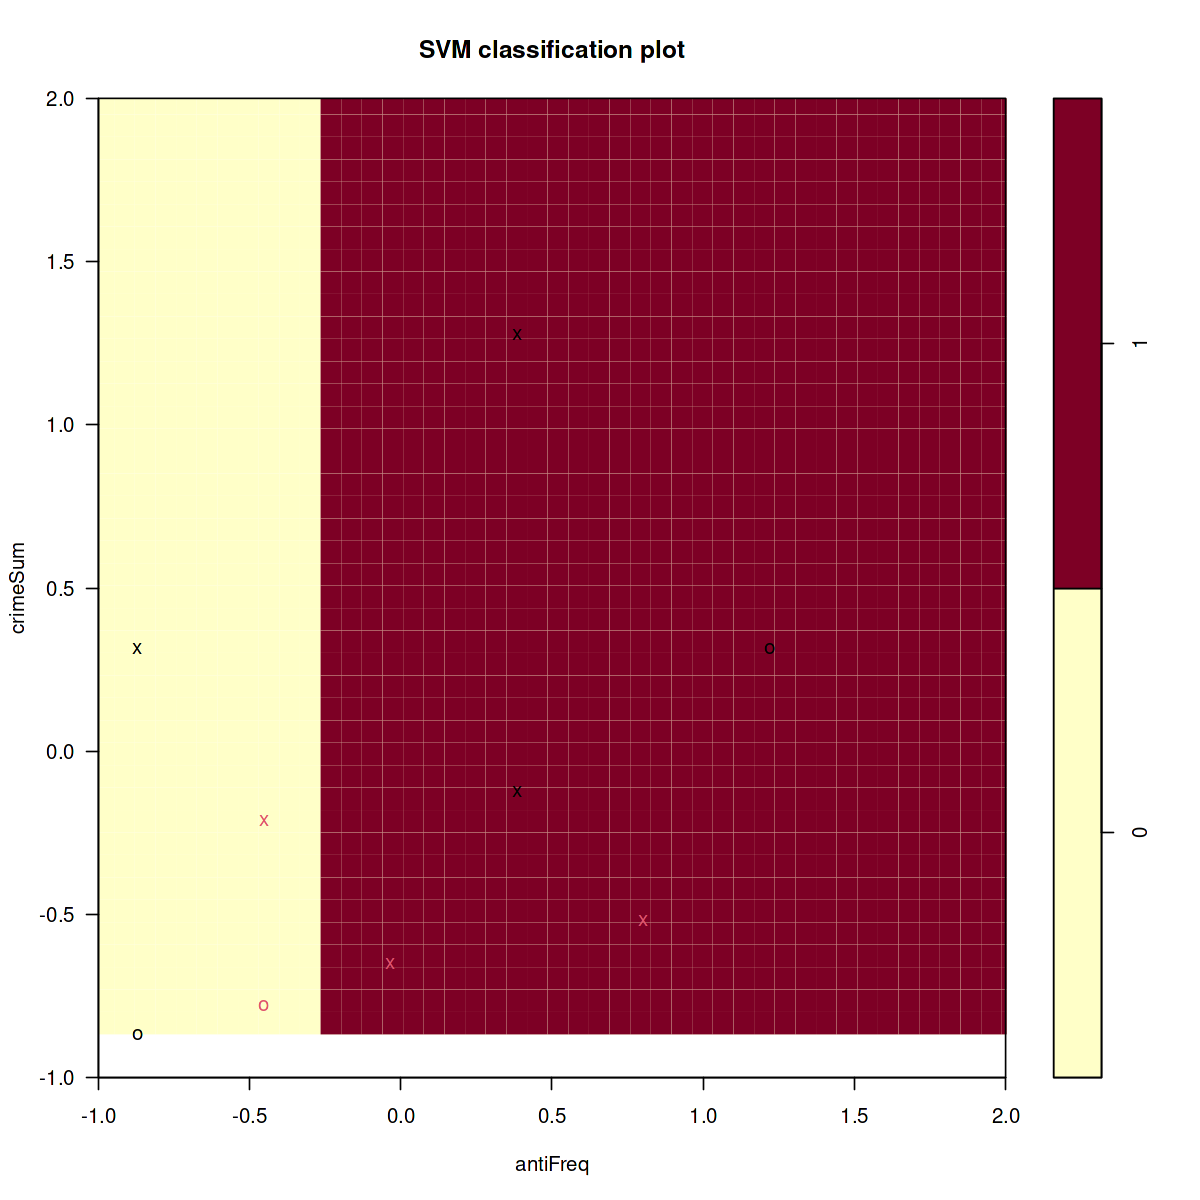

In [62]:
plot(classifier2, testSet2, xlim=c(-1,2),ylim=c(-1,2))

above is the test data

In [63]:
cmL <- table(testSet2[,3], y_pred)
cmL

   y_pred
    0 1
  0 3 3
  1 3 3

evenly incorrect
- 25% for all false positives and negatives

In [64]:
## Importing packages
library(datasets)   # library(help = "datasets")
library(tidyverse)  # install.packages("tidyverse"). ggplot2. Details https://www.tidyverse.org
library(caret)      # The caret package (short for Classification And REgression Training)
library(grid)       # grid is a low-level graphics system which provides a great deal of control and flexibility.
library(gridExtra)  # provides useful extensions to the grid system
library(GGally)     # Extension to 'ggplot2'. a plotting system based on the grammar of graphics
library(rpart)      # Rpart is machine learning library in R that is used for building classification & regression trees
library(rpart.plot) # to plot tree
library(corrplot)   # provides a visual exploratory tool on correlation matrix
library(randomForest)
library(caTools)
#https://www.r-bloggers.com/2021/04/random-forest-in-r/

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

corrplot 0.92 loaded

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [65]:
head(merged)

,State,Abbreviation,Sexual_Orientation,Gender,Gender_Identity,antilgbtqFreq,religiousExemptionFrequency,preemptingProtectionFrequency,lgbtqFreq,crimeSum,antiFreq,DEM,REP,percent_democrat,percent_republican,population,senate,house,crime_percent
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,Alabama,AL,32,5,4,3,0,0,0,41,3,843473,1434159,37.03289,62.96711,2277632,Republican,Republican,0.1607843
2,Alaska,AK,4,2,1,0,0,0,1,7,0,45758,80999,36.09899,63.90101,126757,Republican,Split,0.5833333
3,Arizona,AZ,16,0,4,4,0,0,2,20,4,1643664,1626679,50.25968,49.74032,3270343,Republican,Republican,0.2083333
4,Arkansas,AR,9,3,2,8,4,1,0,14,13,420985,761251,35.60922,64.39078,1182236,Republican,Republican,0.2916667
5,California,CA,16,0,3,0,0,0,7,19,0,9315259,4812735,65.93476,34.06524,14127994,Democratic,Democratic,0.2567568
6,Colorado,CO,67,1,18,0,0,0,0,86,0,1753416,1335253,56.76931,43.23069,3088669,Democratic,Democratic,0.2756410


In [66]:
v<- merged$senate
table(v)

v
Democratic Republican 
        18         32 

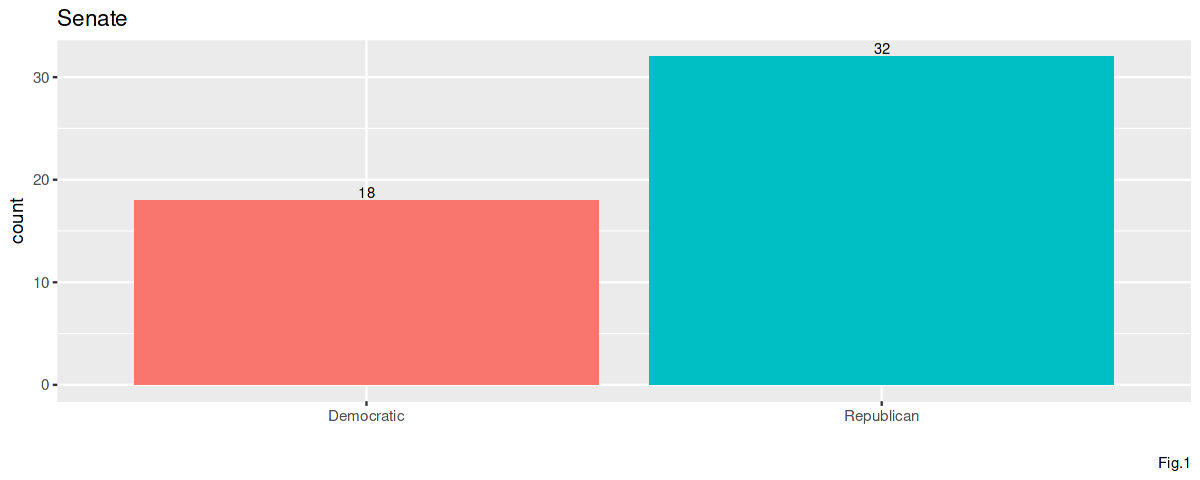

In [106]:
fig(10, 4)
merged %>%  
    group_by(senate) %>%        
    summarise(count = n()) %>%
    ggplot(aes(x = senate, y = count, fill = senate),options(repr.plot.width=10, repr.plot.height=10)) + 
        geom_bar(stat = "identity") +
        geom_text(aes(label = as.character(count)), 
                 position = position_dodge(width = 1),
                 hjust = 0.5, vjust = -0.25, size = 3) +
        theme(legend.position = "none") +
        labs(title = "Senate", x = "", caption = "Fig.1")

In [107]:
data <- merged
data <- data[,-c(1,2)]
data$senate <- as.factor(data$senate)
data$house <- as.factor(data$house)
data$antiFreq <- as.factor(data$antiFreq)
data <- na.omit(data)
data <- data[,-c(1,2,3,4,5,6,7)]
data <- transform(data, crimeSum = as.integer(crimeSum),
                 antiFreq<-as.double(antiFreq),
                 DEM <- as.double(DEM),
                 REP<-as.double(REP),
                 percent_democrat<-as.double(percent_democrat),
                 percent_republican<-as.double(percent_republican),
                 population<-as.double(population),
                 senate<-as.factor(senate),
                 house<-as.factor(house),
                 crime_percent<-as.double(crime_percent))
data <- data[,-c(11,12,13,14,15,16,17,18,19)]
data <- data[,-c(5,6,9)]
data<- data[,-c(3,4)]
head(data)

,crimeSum,antiFreq,population,senate,crime_percent
,<int>,<fct>,<dbl>,<fct>,<dbl>
1,41,3,2277632,Republican,0.1607843
2,7,0,126757,Republican,0.5833333
3,20,4,3270343,Republican,0.2083333
4,14,13,1182236,Republican,0.2916667
5,19,0,14127994,Democratic,0.2567568
6,86,0,3088669,Democratic,0.2756410


In [108]:
# used by all
set.seed(1)
ind <- sample(2, nrow(data), replace = TRUE, prob = c(0.7, 0.3))
train <- data[ind==1,]
test <- data[ind==2,]
head(train)
head(test)

,crimeSum,antiFreq,population,senate,crime_percent
,<int>,<fct>,<dbl>,<fct>,<dbl>
1,41,3,2277632,Republican,0.1607843
2,7,0,126757,Republican,0.5833333
3,20,4,3270343,Republican,0.2083333
5,19,0,14127994,Democratic,0.2567568
8,2,0,495270,Democratic,0.2222222
9,0,6,10962601,Republican,0.0000000


,crimeSum,antiFreq,population,senate,crime_percent
,<int>,<fct>,<dbl>,<fct>,<dbl>
4,14,13,1182236,Republican,0.29166667
6,86,0,3088669,Democratic,0.27564103
7,17,2,1758331,Democratic,0.18478261
15,16,9,1653802,Republican,0.15238095
17,53,8,2121362,Republican,0.34415584
18,8,4,2111158,Republican,0.05333333


In [109]:
#random forest to predict senate majority
rf <- randomForest(senate~., data=train, proximity=TRUE) 
print(rf)


Call:
 randomForest(formula = senate ~ ., data = train, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 38.24%
Confusion matrix:
           Democratic Republican class.error
Democratic          3          8   0.7272727
Republican          5         18   0.2173913


In [110]:
p1 <- predict(rf, train)
confusionMatrix(p1, train$senate)

Confusion Matrix and Statistics

            Reference
Prediction   Democratic Republican
  Democratic         11          0
  Republican          0         23
                                     
               Accuracy : 1          
                 95% CI : (0.8972, 1)
    No Information Rate : 0.6765     
    P-Value [Acc > NIR] : 1.692e-06  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.3235     
         Detection Rate : 0.3235     
   Detection Prevalence : 0.3235     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : Democratic 
                                     

In [111]:
p2 <- predict(rf, test)
confusionMatrix(p2, test$senate)

Confusion Matrix and Statistics

            Reference
Prediction   Democratic Republican
  Democratic          5          0
  Republican          2          9
                                          
               Accuracy : 0.875           
                 95% CI : (0.6165, 0.9845)
    No Information Rate : 0.5625          
    P-Value [Acc > NIR] : 0.008643        
                                          
                  Kappa : 0.7377          
                                          
 Mcnemar's Test P-Value : 0.479500        
                                          
            Sensitivity : 0.7143          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.8182          
             Prevalence : 0.4375          
         Detection Rate : 0.3125          
   Detection Prevalence : 0.3125          
      Balanced Accuracy : 0.8571          
                                          
       'Positive' Class

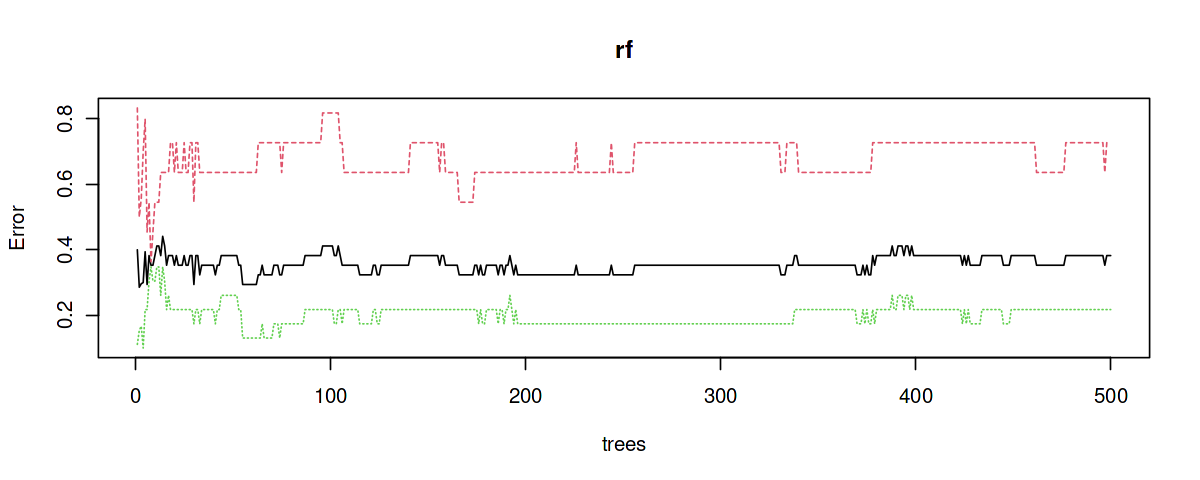

In [112]:
plot(rf)

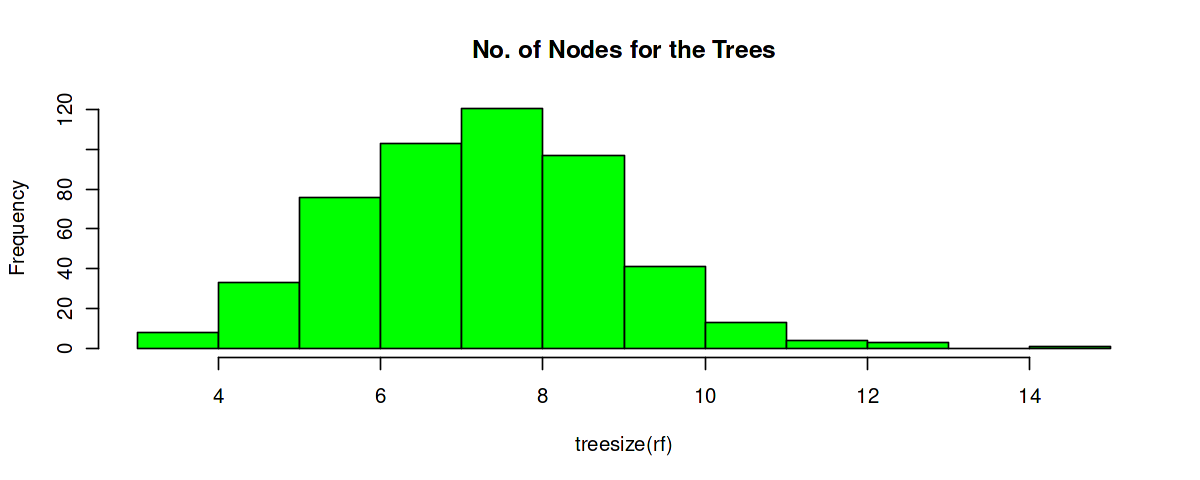

In [113]:
hist(treesize(rf),
     main = "No. of Nodes for the Trees",
     col = "green")

,MeanDecreaseGini
crimeSum,2.948305
antiFreq,4.957877
population,3.621038
crime_percent,2.941879


ERROR: Error in `[.data.frame`(pred.data, , xname): undefined columns selected


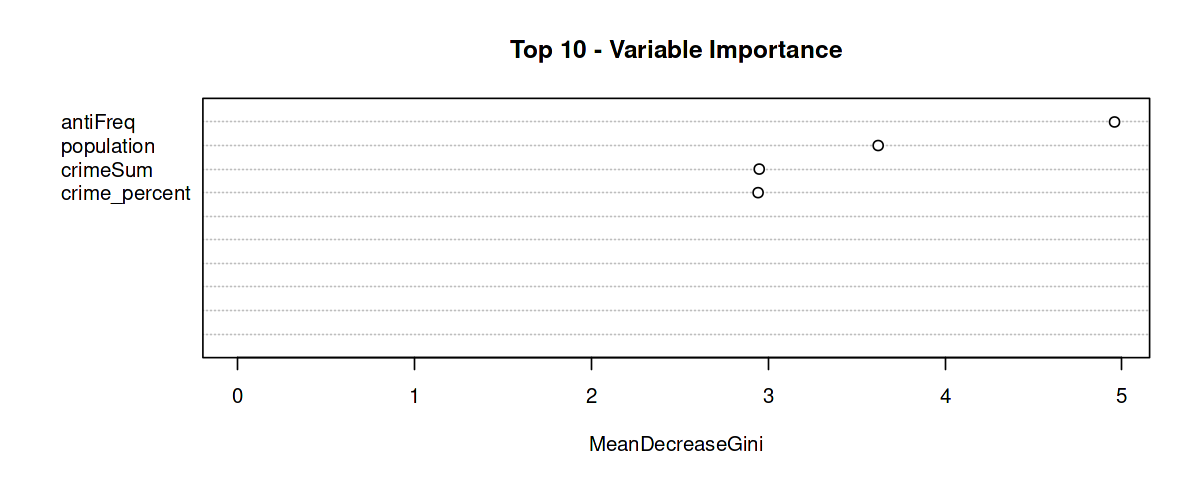

In [105]:
varImpPlot(rf,
           sort = T,
           n.var = 10,
           main = "Top 10 - Variable Importance")
importance(rf)
partialPlot(rf, train, percent_republican)
MDSplot(rf, train$senate)